In this lecture, we’ll look at a few difficulties that often occur when getting
our real world data into pandas. These involve dealing with data that are badly formatted and/or spread across multiple files.

## 1. Awkward input files
1. Inconsistent data
2. Not having a header row for the data
3. Empty columns
4. Footer following the data
5. Numbers contains other characters other than a dot as the decimal separator
6. Missing values
7. Inconsistent thousands separators
8. Comment lines in the data
9. Inconsistent boolean values

In [ ]:
import pandas as pd
awkward_file = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/awkward_input.csv"

### 1.1 Inconsistent data
Sometimes files are just a clean like a comma- or tab-delimited file. Such as having header lines, comment lines, or footer.

In [ ]:
awkward = pd.read_csv(awkward_file)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


In [ ]:
awkward = pd.read_csv(awkward_file,
                      skiprows=11 # skip the first 11 rows
                     )
awkward

,Arabidopsis thaliana,"119,669",36.0529,38_311,2001.0,Chromosome,False,True,Unnamed: 8,Unnamed: 9
0,Glycine max,"979,046",35.1153,59_847,2010.0,Chromosome,False,True,NaN,NaN
1,Medicago truncatula,"412,924",34.047,37_603,2011.0,Chromosome,False,True,NaN,NaN
2,Solanum lycopersicum,"828,349",35.6991,31_200,2010.0,Chromosome,no,yes,NaN,NaN
3,Hordeum vulgare,"4006,12",44.3,NaN,2019.0,Scaffold,False,True,NaN,NaN
4,Oryza sativa Japonica Group,"374,423",43.5769,35_219,2015.0,Chromosome,"""f""","""t""",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3048,Homo sapiens,"2,097",45.8,NaN,2017.0,Scaffold,1,0,NaN,NaN
3049,Homo sapiens,"4,781",44.6,NaN,2017.0,Scaffold,1,0,NaN,NaN
3050,Homo sapiens,"4,799",44.6,missing,2017.0,Scaffold,True,False,NaN,NaN
3051,Homo sapiens,"2,79",34.8,NaN,2017.0,Scaffold,True,False,NaN,NaN


### 1.2. Not having a header row for the data
Pandas by default assumes that the first line of data is actually the column names. If the first line of your data is not the header line that contains the column names, we can fix this by explicitly giving a list of column names that we want in the `names` argument:

In [ ]:
my_columns = ["Species","Genome size","GC%","Genes",
              "Year","Status","Is animal","Is plant"]

awkward = pd.read_csv(awkward_file,
                      na_values=['-'], # set - as NaN
                      skiprows=11,
                      names=my_columns # explicitly define the
                     )                 # column names
awkward

Species Genome size     GC%  \
Arabidopsis thaliana               119,669  36.0529      38_311  2001.0   
Glycine max                        979,046  35.1153      59_847  2010.0   
Medicago truncatula                412,924   34.047      37_603  2011.0   
Solanum lycopersicum               828,349  35.6991      31_200  2010.0   
Hordeum vulgare                    4006,12     44.3         NaN  2019.0   
...                                             ...         ...     ...   
Homo sapiens                       2,097       45.8         NaN  2017.0   
                                   4,781       44.6         NaN  2017.0   
                                   4,799       44.6     missing  2017.0   
                                   2,79        34.8         NaN  2017.0   
This is version 2.5432 of the file NaN          NaN         NaN     NaN   

                                                 Genes   Year Status  \
Arabidopsis thaliana               119,669  Chromosome  False   True   
Glycine max                        979,046  Chromosome  False   True   
Medicago truncatula                412,924  Chromosome  False   True   
Solanum lycopersicum               828,349  Chromosome     no    yes   
Hordeum vulgare                    4006,12    Scaffold  False   True   
...                                                ...    ...    ...   
Homo sapiens                       2,097      Scaffold      1      0   
                                   4,781      Scaffold      1      0   
                                   4,799      Scaffold   True  False   
                                   2,79       Scaffold   True  False   
This is version 2.5432 of the file NaN             NaN    NaN    NaN   

                                            Is animal  Is plant  
Arabidopsis thaliana               119,669        NaN       NaN  
Glycine max                        979,046        NaN       NaN  
Medicago truncatula                412,924        NaN       NaN  
Solanum lycopersicum               828,349        NaN       NaN  
Hordeum vulgare                    4006,12        NaN       NaN  
...                                               ...       ...  
Homo sapiens                       2,097          NaN       NaN  
                                   4,781          NaN       NaN  
                                   4,799          NaN       NaN  
                                   2,79           NaN       NaN  
This is version 2.5432 of the file NaN            NaN       NaN  

[3054 rows x 8 columns]

### 1.3. Empty columns
If you look at the raw data in the **awkward_input.csv**, you will see that all the data line ends with two commas. This is a fairly common occurence, especially in files that have been exported from spreadsheet programs such as Excel. These two extra commas cause pandas to assume that each row has 10 fields rather than 8, so when we give a list of only 8 column names, it uses the first two as the index. In our case, this means that all of the column names are offset by two places.

To fix this, we will need to explictly tell pandas with columns we want to use with the `usecols` argument.

In [ ]:
awkward = pd.read_csv(awkward_file,
                      na_values=['-'],
                      skiprows=11,
                      names=my_columns,
                      usecols=my_columns # explicitly specify which
                     )                   # columns to use
awkward

,Species,Genome size,GC%,Genes,Year,Status,Is animal,Is plant
0,Arabidopsis thaliana,"119,669",36.0529,38_311,2001.0,Chromosome,False,True
1,Glycine max,"979,046",35.1153,59_847,2010.0,Chromosome,False,True
2,Medicago truncatula,"412,924",34.047,37_603,2011.0,Chromosome,False,True
3,Solanum lycopersicum,"828,349",35.6991,31_200,2010.0,Chromosome,no,yes
4,Hordeum vulgare,"4006,12",44.3,NaN,2019.0,Scaffold,False,True
...,...,...,...,...,...,...,...,...
3049,Homo sapiens,"2,097",45.8,NaN,2017.0,Scaffold,1,0
3050,Homo sapiens,"4,781",44.6,NaN,2017.0,Scaffold,1,0
3051,Homo sapiens,"4,799",44.6,missing,2017.0,Scaffold,True,False
3052,Homo sapiens,"2,79",34.8,NaN,2017.0,Scaffold,True,False


### 1.4 There might be footer following the data
Notice the last row in the dataframe - it is obviously
not real data as is corresponds to a footer in the original file. Many real life data files include a footer like this. We can tell pandas to skip it by passing `skipfooter` (on some
versions, this may cause a `ParserWarning` , but it will still work):

In [ ]:
awkward = pd.read_csv(awkward_file,
                      na_values=['-'],
                      skiprows=11,
                      names=my_columns,
                      usecols=my_columns,
                      engine='python', # avoid warning
                      skipfooter=1 # skip one footer line
                     )
awkward

,Species,Genome size,GC%,Genes,Year,Status,Is animal,Is plant
0,Arabidopsis thaliana,"119,669",36.0529,38_311,2001.0,Chromosome,False,True
1,Glycine max,"979,046",35.1153,59_847,2010.0,Chromosome,False,True
2,Medicago truncatula,"412,924",34.047,37_603,2011.0,Chromosome,False,True
3,Solanum lycopersicum,"828,349",35.6991,31_200,2010.0,Chromosome,no,yes
4,Hordeum vulgare,"4006,12",44.3,NaN,2019.0,Scaffold,False,True
...,...,...,...,...,...,...,...,...
3048,Homo sapiens,"4,898",44.6,missing,2017.0,Scaffold,yes,no
3049,Homo sapiens,"2,097",45.8,NaN,2017.0,Scaffold,1,0
3050,Homo sapiens,"4,781",44.6,NaN,2017.0,Scaffold,1,0
3051,Homo sapiens,"4,799",44.6,missing,2017.0,Scaffold,True,False


### 1.5. Numbers contains other characters other than a dot as the decimal separator

In [ ]:
# examine the data types
awkward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      3053 non-null   object 
 1   Genome size  3051 non-null   object 
 2   GC%          2897 non-null   object 
 3   Genes        1296 non-null   object 
 4   Year         3051 non-null   float64
 5   Status       3051 non-null   object 
 6   Is animal    3051 non-null   object 
 7   Is plant     3051 non-null   object 
dtypes: float64(1), object(7)
memory usage: 190.9+ KB


We notice that **Genome size**, **GC%**, and **Genes** should be numbers.

In [ ]:
awkward["Genome size"]

,Genome size
0,"119,669"
1,"979,046"
2,"412,924"
3,"828,349"
4,"4006,12"
...,...
3048,"4,898"
3049,"2,097"
3050,"4,781"
3051,"4,799"


Looking at the values, we can see that these numbers have been written with a comma rather than a dot as the decimal separator (common practice in many countries). Setting the `decimal` argument will allow these numbers to be parsed correctly and turn our **Genome size** column into a floating point data type:

In [ ]:
awkward = pd.read_csv(awkward_file,
                      na_values=['-'],
                      skiprows=11,
                      names=my_columns,
                      usecols=my_columns,
                      skipfooter=1,
                      engine='python', # avoid warning
                      decimal="," # specify decimal character
                     )
awkward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      3053 non-null   object 
 1   Genome size  3051 non-null   float64
 2   GC%          2897 non-null   object 
 3   Genes        1296 non-null   object 
 4   Year         3051 non-null   float64
 5   Status       3051 non-null   object 
 6   Is animal    3051 non-null   object 
 7   Is plant     3051 non-null   object 
dtypes: float64(2), object(6)
memory usage: 190.9+ KB


In [ ]:
awkward

,Species,Genome size,GC%,Genes,Year,Status,Is animal,Is plant
0,Arabidopsis thaliana,119.669,36.0529,38_311,2001.0,Chromosome,False,True
1,Glycine max,979.046,35.1153,59_847,2010.0,Chromosome,False,True
2,Medicago truncatula,412.924,34.047,37_603,2011.0,Chromosome,False,True
3,Solanum lycopersicum,828.349,35.6991,31_200,2010.0,Chromosome,no,yes
4,Hordeum vulgare,4006.120,44.3,NaN,2019.0,Scaffold,False,True
...,...,...,...,...,...,...,...,...
3048,Homo sapiens,4.898,44.6,missing,2017.0,Scaffold,yes,no
3049,Homo sapiens,2.097,45.8,NaN,2017.0,Scaffold,1,0
3050,Homo sapiens,4.781,44.6,NaN,2017.0,Scaffold,1,0
3051,Homo sapiens,4.799,44.6,missing,2017.0,Scaffold,True,False


### 1.6. Missing values

In [ ]:
awkward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      3053 non-null   object 
 1   Genome size  3051 non-null   float64
 2   GC%          2897 non-null   object 
 3   Genes        1296 non-null   object 
 4   Year         3051 non-null   float64
 5   Status       3051 non-null   object 
 6   Is animal    3051 non-null   object 
 7   Is plant     3051 non-null   object 
dtypes: float64(2), object(6)
memory usage: 190.9+ KB


**GC%** should be numeric, let's see if there is any non-numeric data in that column.

In [ ]:
awkward["GC%"]

0       36.0529
1       35.1153
2        34.047
3       35.6991
4          44.3
         ...   
3048       44.6
3049       45.8
3050       44.6
3051       44.6
3052       34.8
Name: GC%, Length: 3053, dtype: object

In [ ]:
import re
all_GC = awkward["GC%"].dropna().unique()
non_num = [i for i in all_GC if not re.match("[.0-9]+", i)] # python list comprehension
print(non_num)

['missing']


We can add 'missing' to our list of `na_values`

In [ ]:
awkward = pd.read_csv(awkward_file,
                      na_values=['-', 'missing'], # include missing
                      skiprows=11,
                      names=my_columns,
                      usecols=my_columns,
                      skipfooter=1,
                      engine='python',
                      decimal=","
                     )
awkward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      3053 non-null   object 
 1   Genome size  3051 non-null   float64
 2   GC%          2859 non-null   float64
 3   Genes        802 non-null    object 
 4   Year         3051 non-null   float64
 5   Status       3051 non-null   object 
 6   Is animal    3051 non-null   object 
 7   Is plant     3051 non-null   object 
dtypes: float64(3), object(5)
memory usage: 190.9+ KB


### 1.7. Inconsistent thousands separators


**Genes** should be numeric, let's see if there is any non-numeric data in that column.

In [ ]:
awkward["Genes"].head()

,Genes
0,38_311
1,59_847
2,37_603
3,31_200
4,NaN


The problem is the thousands separator, which is an underscore. Setting the thousands argument will allow pandas to parse these numbers properly:

In [ ]:
awkward = pd.read_csv(awkward_file,
                      na_values=['-', 'missing'],
                      skiprows=11,
                      names=my_columns,
                      usecols=my_columns,
                      skipfooter=1,
                      engine='python',
                      decimal=",",
                      thousands="_"
                     )
awkward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      3053 non-null   object 
 1   Genome size  3051 non-null   float64
 2   GC%          2859 non-null   float64
 3   Genes        802 non-null    float64
 4   Year         3051 non-null   float64
 5   Status       3051 non-null   object 
 6   Is animal    3051 non-null   object 
 7   Is plant     3051 non-null   object 
dtypes: float64(4), object(4)
memory usage: 190.9+ KB


Now that we have all our columns in the right dtypes, take a look at the numbers of values. We have 3053 rows, but five of the columns that we expect to have no missing data have 3051 values. This is suspicious! Let’s find the two rows with a missing size and take a look at the data:

In [ ]:
awkward[awkward["Year"].isnull()]

,Species,Genome size,GC%,Genes,Year,Status,Is animal,Is plant
28,# the next two genomes belong to frogs,NaN,NaN,NaN,NaN,None,None,None
86,# three different Caenorhabditis species,NaN,NaN,NaN,NaN,None,None,None


### 1.8 Comment lines in the data
These comment lines contain no commas, so the entire line has
ended up in the Species column. The remaining columns for those rows are either missing data (in the case of the numerical columns) or `None` (in the case of the string columns).

To fix this, we just have to tell pandas that lines begining with a hash symbol are comments by setting the `comment` argument:

In [ ]:
awkward = pd.read_csv(awkward_file,
                      na_values=['-', 'missing'],
                      skiprows=11,
                      names=my_columns,
                      usecols=my_columns,
                      skipfooter=1,
                      engine='python',
                      decimal=",",
                      thousands="_",
                      comment="#" # lines starts with # is considered
                     )            # comments.
awkward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      3051 non-null   object 
 1   Genome size  3051 non-null   float64
 2   GC%          2859 non-null   float64
 3   Genes        802 non-null    float64
 4   Year         3051 non-null   float64
 5   Status       3051 non-null   object 
 6   Is animal    3051 non-null   object 
 7   Is plant     3051 non-null   object 
dtypes: float64(4), object(4)
memory usage: 190.8+ KB


In [ ]:
awkward

,Species,Genome size,GC%,Genes,Year,Status,Is animal,Is plant
0,Arabidopsis thaliana,119.669,36.0529,38311.0,2001.0,Chromosome,False,True
1,Glycine max,979.046,35.1153,59847.0,2010.0,Chromosome,False,True
2,Medicago truncatula,412.924,34.0470,37603.0,2011.0,Chromosome,False,True
3,Solanum lycopersicum,828.349,35.6991,31200.0,2010.0,Chromosome,no,yes
4,Hordeum vulgare,4006.120,44.3000,NaN,2019.0,Scaffold,False,True
...,...,...,...,...,...,...,...,...
3046,Homo sapiens,4.898,44.6000,NaN,2017.0,Scaffold,yes,no
3047,Homo sapiens,2.097,45.8000,NaN,2017.0,Scaffold,1,0
3048,Homo sapiens,4.781,44.6000,NaN,2017.0,Scaffold,1,0
3049,Homo sapiens,4.799,44.6000,NaN,2017.0,Scaffold,True,False


### 1.9. Inconsistent boolean values
Let’s take a look at the final two columns: **Is animal** and **Is plant**. These are examples of data types that we’ve not seen before - _boolean_ data, i.e. True/False values. We can specify what data type we want for a given column by passing a `dtype` dict, so let’s try making these boolean:

In [ ]:
awkward = pd.read_csv(awkward_file,
                      na_values=['-', 'missing'],
                      skiprows=11,
                      names=my_columns,
                      usecols=my_columns,
                      skipfooter=1,
                      engine='python',
                      decimal=",",
                      thousands="_",
                      comment="#",
                      #dtype={"Is animal": bool, "Is plant": bool} ## DON'T RUN YET!!!
                     )
awkward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      3051 non-null   object 
 1   Genome size  3051 non-null   float64
 2   GC%          2859 non-null   float64
 3   Genes        802 non-null    float64
 4   Year         3051 non-null   float64
 5   Status       3051 non-null   object 
 6   Is animal    3051 non-null   object 
 7   Is plant     3051 non-null   object 
dtypes: float64(4), object(4)
memory usage: 190.8+ KB


In [ ]:
awkward

,Species,Genome size,GC%,Genes,Year,Status,Is animal,Is plant
0,Arabidopsis thaliana,119.669,36.0529,38311.0,2001.0,Chromosome,False,True
1,Glycine max,979.046,35.1153,59847.0,2010.0,Chromosome,False,True
2,Medicago truncatula,412.924,34.0470,37603.0,2011.0,Chromosome,False,True
3,Solanum lycopersicum,828.349,35.6991,31200.0,2010.0,Chromosome,no,yes
4,Hordeum vulgare,4006.120,44.3000,NaN,2019.0,Scaffold,False,True
...,...,...,...,...,...,...,...,...
3046,Homo sapiens,4.898,44.6000,NaN,2017.0,Scaffold,yes,no
3047,Homo sapiens,2.097,45.8000,NaN,2017.0,Scaffold,1,0
3048,Homo sapiens,4.781,44.6000,NaN,2017.0,Scaffold,1,0
3049,Homo sapiens,4.799,44.6000,NaN,2017.0,Scaffold,True,False


In [ ]:
# How does python evaluate non-boolean values
x = "False"

if x:
    print("True")
else:
    print("False")

True


In [ ]:
# Let's check how many True/False in the column Is animal
awkward["Is animal"].value_counts()

,count
Is animal,
1,750
True,661
yes,446
"""t""",324
0,297
False,254
no,188
"""f""",131


This doesn't look right since we have both plants and animals data in this file. Let's try take a step back and undo setting the dtype.

The reason for the preponderance of `True` values when we tried setting the data type as boolean is because of Python’s rule for determining boolean values. The rule for strings is simple: any non-empty string counts as true. So all of the values that are in the file are interpreted as true.

In [ ]:
trueList = []
falseList = []
for val in awkward["Is animal"].unique():
    trueList.append(val)
    #print(repr(val), bool(val))


#print(trueList)
falseList = trueList[0:4]
trueList = trueList[4:]

print(falseList)
print(trueList)


['False', 'no', '"f"', '0']
['1', 'yes', '"t"', 'True']


Let’s fix the boolean values by passing `true_values` and `false_values` to explicity tell pandas what values we want to interpret as true and false:

In [ ]:
awkward = pd.read_csv(awkward_file,
                      na_values=['-', 'missing'],
                      skiprows=11,
                      names=my_columns,
                      usecols=my_columns,
                      skipfooter=1,
                      engine='python',
                      decimal=",",
                      thousands="_",
                      comment="#",
                      # explicitly define the true/false values
                      #true_values=['True', '1', 'yes', '"t'"],
                      #false_values=['False', '0', 'no', '"f'"],
                      true_values = trueList,
                      false_values = falseList,
                      dtype={"Is animal": bool, "Is plant": bool}
                     )
awkward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      3051 non-null   object 
 1   Genome size  3051 non-null   float64
 2   GC%          2859 non-null   float64
 3   Genes        802 non-null    float64
 4   Year         3051 non-null   float64
 5   Status       3051 non-null   object 
 6   Is animal    3051 non-null   bool   
 7   Is plant     3051 non-null   bool   
dtypes: bool(2), float64(4), object(2)
memory usage: 149.1+ KB


In [ ]:
# check to see if we have a good mixture of True and False
awkward[["Is animal","Is plant"]].apply(lambda x: x.value_counts())

,Is animal,Is plant
False,870,2181
True,2181,870


In [ ]:
awkward

,Species,Genome size,GC%,Genes,Year,Status,Is animal,Is plant
0,Arabidopsis thaliana,119.669,36.0529,38311.0,2001.0,Chromosome,False,True
1,Glycine max,979.046,35.1153,59847.0,2010.0,Chromosome,False,True
2,Medicago truncatula,412.924,34.0470,37603.0,2011.0,Chromosome,False,True
3,Solanum lycopersicum,828.349,35.6991,31200.0,2010.0,Chromosome,False,True
4,Hordeum vulgare,4006.120,44.3000,NaN,2019.0,Scaffold,False,True
...,...,...,...,...,...,...,...,...
3046,Homo sapiens,4.898,44.6000,NaN,2017.0,Scaffold,True,False
3047,Homo sapiens,2.097,45.8000,NaN,2017.0,Scaffold,True,False
3048,Homo sapiens,4.781,44.6000,NaN,2017.0,Scaffold,True,False
3049,Homo sapiens,4.799,44.6000,NaN,2017.0,Scaffold,True,False


## 2. Combining multiple files
A very common obstacle to data analysis is when our data are spread out over multiple files. In the real world we often have
to bring data together from multiple sources before we can start our analysis.

### 2.1 Concatenation
Let's look at the dataframe that contains the monthly rainfall data for London, Berlin, and Edinburgh.

In [ ]:
import pandas as pd
london_data="https://raw.githubusercontent.com/csbfx/advpy122-data/master/London_daily_rain.csv"

berlin_data="https://raw.githubusercontent.com/csbfx/advpy122-data/master/Berlin_daily_rain.csv"

edinburgh_data="https://raw.githubusercontent.com/csbfx/advpy122-data/master/Edinburgh_daily_rain.csv"

london_rain = pd.read_csv(london_data)
london_rain.head()
#london_rain.info()

,Year,Month,Day of month,Day of year,Rainfall (mm)
0,1960,January,1,1,22.0
1,1960,January,2,2,23.0
2,1960,January,3,3,7.0
3,1960,January,4,4,0.0
4,1960,January,5,5,0.0


In [ ]:
berlin_rain = pd.read_csv(berlin_data)
berlin_rain.head()
#berlin_rain.info()

,Year,Month,Day of month,Day of year,Rainfall (mm)
0,1960,January,1,1,4.0
1,1960,January,2,2,25.0
2,1960,January,3,3,0.0
3,1960,January,4,4,0.0
4,1960,January,5,5,104.0


In [ ]:
edinburgh_rain = pd.read_csv(edinburgh_data)
edinburgh_rain.head()

,Year,Month,Day of month,Day of year,Rainfall (mm)
0,1960,January,1,1,26.0
1,1960,January,2,2,24.0
2,1960,January,3,3,7.0
3,1960,January,4,4,3.0
4,1960,January,5,5,4.0


Once we’ve got our three dataframes in memory, we can check that they have the same length and having the same columns:

In [ ]:
# check the length of each dataframe
all_dfs = [london_rain, berlin_rain, edinburgh_rain]
print("Lengths:", [len(df) for df in all_dfs])

# check the columns of each dataframe
for cols in [df.columns for df in all_dfs]:
    print(cols)


Lengths: [21762, 21762, 21762]
Index(['Year', 'Month', 'Day of month', 'Day of year', 'Rainfall (mm)'], dtype='object')
Index(['Year', 'Month', 'Day of month', 'Day of year', 'Rainfall (mm)'], dtype='object')
Index(['Year', 'Month', 'Day of month', 'Day of year', 'Rainfall (mm)'], dtype='object')


Once we are satisfied that the columns are all the same, we know that we can combine these dataframes by simply putting them underneath each other to get one combined dataframe. The function that does the **concatenation** is `pd.concat`, and all we have to give it is a list of dataframes to concatenate:

In [ ]:
all_rain = pd.concat(all_dfs)
all_rain

,Year,Month,Day of month,Day of year,Rainfall (mm)
0,1960,January,1,1,22.0
1,1960,January,2,2,23.0
2,1960,January,3,3,7.0
3,1960,January,4,4,0.0
4,1960,January,5,5,0.0
...,...,...,...,...,...
21757,2019,July,27,208,18.0
21758,2019,July,28,209,0.0
21759,2019,July,29,210,4.0
21760,2019,July,30,211,41.0


Although the data look fine from a glance at the big dataframe, in fact we have run into a common problem - we
have lost track of which rows belong to which city. In other words, if we take our big dataframe and select a single
day:

In [ ]:
all_rain[(all_rain["Year"] == 2015)
        & (all_rain["Month"] == "October")
        & (all_rain["Day of month"]== 29)
        ]

,Year,Month,Day of month,Day of year,Rainfall (mm)
20390,2015,October,29,302,70.0
20390,2015,October,29,302,0.0
20390,2015,October,29,302,71.0


We can see that we have three rainfall measurements, but no idea which city they belong to. To fix this, we need to add a city column to each individual dataframe before we concatenate them.

In [ ]:
london_rain["City"] = "London"
london_rain

,Year,Month,Day of month,Day of year,Rainfall (mm),City
0,1960,January,1,1,22.0,London
1,1960,January,2,2,23.0,London
2,1960,January,3,3,7.0,London
3,1960,January,4,4,0.0,London
4,1960,January,5,5,0.0,London
...,...,...,...,...,...,...
21757,2019,July,27,208,20.0,London
21758,2019,July,28,209,0.0,London
21759,2019,July,29,210,0.0,London
21760,2019,July,30,211,42.0,London


In [ ]:
london_rain["City"] = "London"
berlin_rain["City"] = "Berlin"
edinburgh_rain["City"] = "Edinburgh"

all_rain = pd.concat(all_dfs)
all_rain

,Year,Month,Day of month,Day of year,Rainfall (mm),City
0,1960,January,1,1,22.0,London
1,1960,January,2,2,23.0,London
2,1960,January,3,3,7.0,London
3,1960,January,4,4,0.0,London
4,1960,January,5,5,0.0,London
...,...,...,...,...,...,...
21757,2019,July,27,208,18.0,Edinburgh
21758,2019,July,28,209,0.0,Edinburgh
21759,2019,July,29,210,4.0,Edinburgh
21760,2019,July,30,211,41.0,Edinburgh


In [ ]:
all_rain[(all_rain["Year"] == 2015)
        & (all_rain["Month"] == "October")
        & (all_rain["Day of month"]== 29)
        ]

,Year,Month,Day of month,Day of year,Rainfall (mm),City
20390,2015,October,29,302,70.0,London
20390,2015,October,29,302,0.0,Berlin
20390,2015,October,29,302,71.0,Edinburgh


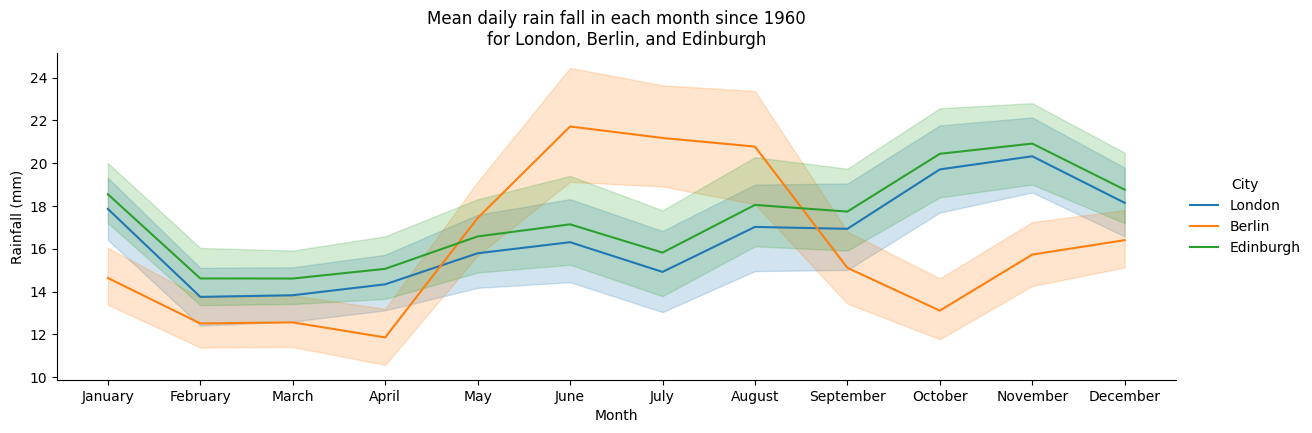

In [ ]:
## Make a plot with the combined dataframe
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

months=["January","February","March","April","May","June","July","August",
"September","October","November","December"]

all_rain["Month"] = all_rain["Month"].astype(
    CategoricalDtype(categories=months,ordered=True)
)

all_rain.reset_index(inplace=True)
sns.relplot(
    data=all_rain,
    x="Month",
    y="Rainfall (mm)",
    aspect=3,
    height=4,
    hue="City",
    kind="line"
)
plt.title("""Mean daily rain fall in each month since 1960
    for London, Berlin, and Edinburgh""");


Berlin is wettest in the summer, with very dry months at the start of the year, whereas the two cities in the UK
have a longer wet period stretching late into the winter.

### 2.2 Adding a single column
To really examine patterns of weather, it would be convenient to have the temperature and rainfall in a single dataframe. Let’s read in our temperature data from _weather.csv_ and see how we might proceed:

In [ ]:
import pandas as pd
weather_data = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/weather.csv"
weather = pd.read_csv(weather_data)
weather

,City,Year,Month,Day of year,Day of month,Mean temperature
0,Berlin,1960,January,1,1,6.4
1,Berlin,1960,January,2,2,8.1
2,Berlin,1960,January,3,3,5.4
3,Berlin,1960,January,4,4,3.9
4,Berlin,1960,January,5,5,6.0
...,...,...,...,...,...,...
63711,London,2018,October,300,27,4.9
63712,London,2018,October,301,28,7.4
63713,London,2018,October,302,29,5.8
63714,London,2018,October,303,30,6.6


In [ ]:
weather.City.unique()

array(['Berlin', 'Edinburgh', 'London'], dtype=object)

Here we have an example of a problem that commonly occurs in real life: our two datasets have almost - but not exactly - the same number of rows. In this case, it’s because the temperature data stops in October 2018, but the rainfall data stops in July 2019. In real world data there can be any number of reasons for slight discrepancies between two datasets.

Because the rows don’t match exactly, we **can’t** combine the two datasets using **concatenation**. What we want is to add just a single column from the temperature dataset to our rainfall `all_rain` dataset. The best way to do this is to set the _same index_ on both the big dataframe and the new column that we want to add.

In [ ]:
# set temperature index
temperatures = (
    weather.set_index(["City", "Year", "Day of year"])
    ["Mean temperature"]
)
temperatures

City    Year  Day of year
Berlin  1960  1              6.4
              2              8.1
              3              5.4
              4              3.9
              5              6.0
                            ... 
London  2018  300            4.9
              301            7.4
              302            5.8
              303            6.6
              304            7.0
Name: Mean temperature, Length: 63716, dtype: float64

In [ ]:
# set the same index for all_rain
all_rain = all_rain.set_index(["City", "Year", "Day of year"])
all_rain

index    Month  Day of month  Rainfall (mm)
City      Year Day of year                                             
London    1960 1                0  January             1           22.0
               2                1  January             2           23.0
               3                2  January             3            7.0
               4                3  January             4            0.0
               5                4  January             5            0.0
...                           ...      ...           ...            ...
Edinburgh 2019 208          21757     July            27           18.0
               209          21758     July            28            0.0
               210          21759     July            29            4.0
               211          21760     July            30           41.0
               212          21761     July            31            0.0

[65286 rows x 4 columns]

We have a series and a dataframe that have the same indices. The indices don’t have exactly the same values - we can tell this because the lengths of the series and the dataframe are different (63716 vs 65286 rows), or we can check it:

In [ ]:
temperatures.index.equals(all_rain.index)

False

To add the temperature to our big dataframe, all we have to do is assign a new column like normal.

In [ ]:
all_rain["Temperature (°C)"] = temperatures
all_rain

index    Month  Day of month  Rainfall (mm)  \
City      Year Day of year                                                
London    1960 1                0  January             1           22.0   
               2                1  January             2           23.0   
               3                2  January             3            7.0   
               4                3  January             4            0.0   
               5                4  January             5            0.0   
...                           ...      ...           ...            ...   
Edinburgh 2019 208          21757     July            27           18.0   
               209          21758     July            28            0.0   
               210          21759     July            29            4.0   
               211          21760     July            30           41.0   
               212          21761     July            31            0.0   

                            Temperature (°C)  
City      Year Day of year                    
London    1960 1                        10.6  
               2                         6.1  
               3                         8.4  
               4                         9.4  
               5                         8.9  
...                                      ...  
Edinburgh 2019 208                       NaN  
               209                       NaN  
               210                       NaN  
               211                       NaN  
               212                       NaN  

[65286 rows x 5 columns]

Pandas uses the matching indices to insert the temperature into the correct rows, and automatically filled in missing data for the rows where there weren’t matching temperature values.

In [ ]:
all_rain.reset_index(inplace=True)
all_rain

,City,Year,Day of year,index,Month,Day of month,Rainfall (mm),Temperature (°C)
0,London,1960,1,0,January,1,22.0,10.6
1,London,1960,2,1,January,2,23.0,6.1
2,London,1960,3,2,January,3,7.0,8.4
3,London,1960,4,3,January,4,0.0,9.4
4,London,1960,5,4,January,5,0.0,8.9
...,...,...,...,...,...,...,...,...
65281,Edinburgh,2019,208,21757,July,27,18.0,NaN
65282,Edinburgh,2019,209,21758,July,28,0.0,NaN
65283,Edinburgh,2019,210,21759,July,29,4.0,NaN
65284,Edinburgh,2019,211,21760,July,30,41.0,NaN


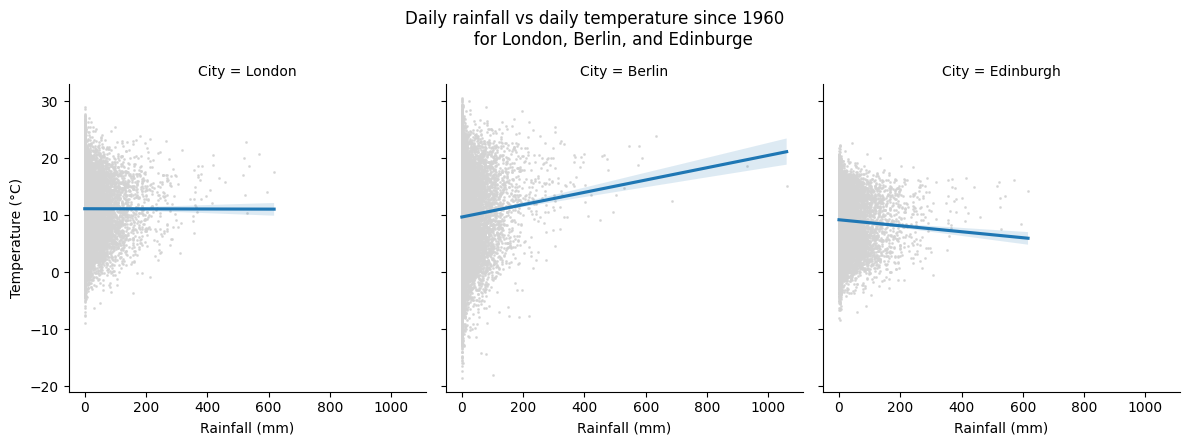

In [ ]:
## Create a correlation plot `lmplot` to see if there is any correlation
## between rainfall and temperature
import seaborn as sns
g=sns.lmplot(
    data=all_rain,
    col="City",
    x="Rainfall (mm)",
    y="Temperature (°C)",
    scatter_kws={"s":1,"color":"lightgrey"},
    height=4,
)
g.fig.suptitle(
    """Daily rainfall vs daily temperature since 1960
       for London, Berlin, and Edinburge""",y=1.1
);

It appears not for the two British cities, but in Berlin, hotter days are definitely wetter.

### 2.3 Merging
If we have a situation that’s more complicated than either of the two outlined above in 2.1 and 2.2, then we need a **merge**.

Unlike concatenating or adding single columns, merging allows us to combine two entire dataframes while having much more control over the process. For example, we can specify exactly how to find matching rows, what we want to do when there are missing rows, and what we want to do when there are multiple matching rows.

Let's use the eukaryote dataset and a file with the common names for the organisms:

In [ ]:
import pandas as pd

common_name_data = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/common_names.csv"
euk_data = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"

euk = pd.read_csv(euk_data, sep="\t")
names = pd.read_csv(common_name_data)

euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


In [ ]:
names

,scientific name,common name
0,Simonsiella muelleri,Scheibenbakterien
1,Simonsiella muelleri,Scheibenbakterien Muller 1911
2,Escherichia coli,E. coli
3,Rickettsia akari,rickettsialpox
4,Anaplasma phagocytophilum,agent of human granulocytic ehrlichiosis
...,...,...
14436,Riboviria,RNA viruses and viroids
14437,Neoheterocotyle quadrispinata,Yotsu-toge-iban-chu
14438,Arthroleptis lameerei,Lameere's squeaker
14439,Erebia albergana,almond-eyed ringlet butterfly


Our goal is to add a new column to our eukaryote dataframe that contains the common name.

Here is the challenge, each **Species** in the `euk` dataframe can have zero, one, or multiple **common names**, and a
**common name** from the `names` dataframe can belong to zero, one or multiple **Species**. This is where most of the
complication lies in merging: deciding what to do when we have multiple matches and missing data.

The method that we need is `merge`. We will have to tell pandas explicitly which columns we want to match. To do this, we refer to the dataframe on which we called the method (df) as the right dataframe, and the one that we passed as the argument (names) as the left dataframe. These are conventional names, simply based
on the order in which we write the variables. So, for our dataset, the **Species** column in the left dataframe matches
the scientific name column from the right dataframe:

In [ ]:
merged = euk.merge(names, left_on="Species", right_on="scientific name")
merged

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,scientific name,common name
0,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome,Arabidopsis thaliana,mouse-ear cress
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome,Arabidopsis thaliana,thale-cress
2,Arabidopsis thaliana,Plants,Land Plants,118.891000,35.8882,27158,30837,2016,Chromosome,Arabidopsis thaliana,mouse-ear cress
3,Arabidopsis thaliana,Plants,Land Plants,118.891000,35.8882,27158,30837,2016,Chromosome,Arabidopsis thaliana,thale-cress
4,Arabidopsis thaliana,Plants,Land Plants,119.627000,36.1052,-,-,2019,Chromosome,Arabidopsis thaliana,mouse-ear cress
...,...,...,...,...,...,...,...,...,...,...,...
3337,Oryza sativa,Plants,Land Plants,0.415952,43.5,-,-,2019,Contig,Oryza sativa,red rice
3338,Oryza sativa,Plants,Land Plants,0.420498,43.6,-,-,2019,Contig,Oryza sativa,red rice
3339,Oryza sativa,Plants,Land Plants,0.414640,43.5,-,-,2019,Contig,Oryza sativa,red rice
3340,Oryza sativa,Plants,Land Plants,0.415805,43.5,-,-,2019,Contig,Oryza sativa,red rice


we can see another interesting phenomenon: where a species has multiple common names, we have ended up with multiple copies of each original row. For example, Arabidopsis thaliana has two common names:

In [ ]:
 names[names["scientific name"]== "Arabidopsis thaliana"]

,scientific name,common name
249,Arabidopsis thaliana,mouse-ear cress
250,Arabidopsis thaliana,thale-cress


so every Arabidopsis thaliana genome in the original dataframe appears twice in the merged dataframe, once with
each common name.

Understanding this behavior is very important, so let’s summarize:
- genomes that have no matching common name are missing from the merged dataframe
- genomes that have multiple common names are duplicated in the merged dataframe

The easiest way to avoid having duplicated entries is to make sure that our names dataframe only contains a single common name for each scientific name, which we can do by calling `drop_duplicates` and telling pandas which columns we want to avoid duplicates in:

In [ ]:
names.drop_duplicates(subset=["scientific name"])

,scientific name,common name
0,Simonsiella muelleri,Scheibenbakterien
2,Escherichia coli,E. coli
3,Rickettsia akari,rickettsialpox
4,Anaplasma phagocytophilum,agent of human granulocytic ehrlichiosis
5,Neorickettsia risticii,equine monocytic ehrlichiosis agent
...,...,...
14435,Riboviria,RNA viruses
14437,Neoheterocotyle quadrispinata,Yotsu-toge-iban-chu
14438,Arthroleptis lameerei,Lameere's squeaker
14439,Erebia albergana,almond-eyed ringlet butterfly


In [ ]:
# Let's do the merge again with unique common names
merged = euk.merge(names.drop_duplicates(subset=["scientific name"]),
                   left_on="Species",
                   right_on="scientific name")
merged

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,scientific name,common name
0,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome,Arabidopsis thaliana,mouse-ear cress
1,Arabidopsis thaliana,Plants,Land Plants,118.891000,35.8882,27158,30837,2016,Chromosome,Arabidopsis thaliana,mouse-ear cress
2,Arabidopsis thaliana,Plants,Land Plants,119.627000,36.1052,-,-,2019,Chromosome,Arabidopsis thaliana,mouse-ear cress
3,Arabidopsis thaliana,Plants,Land Plants,96.500200,36.7,-,-,2011,Scaffold,Arabidopsis thaliana,mouse-ear cress
4,Arabidopsis thaliana,Plants,Land Plants,98.066200,36.6,-,-,2011,Scaffold,Arabidopsis thaliana,mouse-ear cress
...,...,...,...,...,...,...,...,...,...,...,...
1993,Oryza sativa,Plants,Land Plants,0.415952,43.5,-,-,2019,Contig,Oryza sativa,red rice
1994,Oryza sativa,Plants,Land Plants,0.420498,43.6,-,-,2019,Contig,Oryza sativa,red rice
1995,Oryza sativa,Plants,Land Plants,0.414640,43.5,-,-,2019,Contig,Oryza sativa,red rice
1996,Oryza sativa,Plants,Land Plants,0.415805,43.5,-,-,2019,Contig,Oryza sativa,red rice


We get a single output row for each Species that has a common name. The species that don't have a common name are now missing in the merged dataframe.

To put back the missing species - the ones that don’t have matching common names - we need to take a look at the `how` argument to merge. The merges that we have been doing so far have been using the default option, which is 'inner':

In [ ]:
merged = euk.merge(names.drop_duplicates(subset=["scientific name"]),
                   left_on="Species",
                   right_on="scientific name",
                   how="inner")
merged

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,scientific name,common name
0,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome,Arabidopsis thaliana,mouse-ear cress
1,Arabidopsis thaliana,Plants,Land Plants,118.891000,35.8882,27158,30837,2016,Chromosome,Arabidopsis thaliana,mouse-ear cress
2,Arabidopsis thaliana,Plants,Land Plants,119.627000,36.1052,-,-,2019,Chromosome,Arabidopsis thaliana,mouse-ear cress
3,Arabidopsis thaliana,Plants,Land Plants,96.500200,36.7,-,-,2011,Scaffold,Arabidopsis thaliana,mouse-ear cress
4,Arabidopsis thaliana,Plants,Land Plants,98.066200,36.6,-,-,2011,Scaffold,Arabidopsis thaliana,mouse-ear cress
...,...,...,...,...,...,...,...,...,...,...,...
1993,Oryza sativa,Plants,Land Plants,0.415952,43.5,-,-,2019,Contig,Oryza sativa,red rice
1994,Oryza sativa,Plants,Land Plants,0.420498,43.6,-,-,2019,Contig,Oryza sativa,red rice
1995,Oryza sativa,Plants,Land Plants,0.414640,43.5,-,-,2019,Contig,Oryza sativa,red rice
1996,Oryza sativa,Plants,Land Plants,0.415805,43.5,-,-,2019,Contig,Oryza sativa,red rice


`how='inner'` means that we want to keep only the rows that are present in both of the input dataframes. Changing this to `how='left'` means that we want to include all the rows from the left dataframe, even the ones that have no matching row in the right. In our case, this means keeping all species, even the ones that have no common name:

In [ ]:
merged = euk.merge(names.drop_duplicates(subset=["scientific name"]),
                   left_on="Species",
                   right_on="scientific name",
                   how="left")
merged

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status,scientific name,common name
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold,NaN,NaN
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome,Arabidopsis thaliana,mouse-ear cress
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome,Glycine max,soybeans
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome,NaN,NaN
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold,Saccharomyces cerevisiae,S. cerevisiae
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome,Saccharomyces cerevisiae,S. cerevisiae
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome,Saccharomyces cerevisiae,S. cerevisiae
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome,Saccharomyces cerevisiae,S. cerevisiae
